# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
# load imdb dataset as pandas dataframe
imdb_df=pd.read_csv('/content/imdb_1000.csv')

In [3]:
# show first 5 rows of imdb_df
imdb_df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [33]:
# load bikes dataset as pandas dataframe
bikes_df=pd.read_csv('/content/Bikes_new.csv')

In [34]:
# show first 3 rows of bikes_df
bikes_df.head(3)


,Date,Rachel,Unnamed,Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup
0,01/01/2012,16,35,51,38,5.0,26,10,0,27.0
1,02/01/2012,43,83,153,68,11.0,53,6,1,21.0
2,03/01/2012,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [10]:
# list columns of imdb_df
imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [7]:
# what are the datatypes of values in columns
imdb_df.dtypes

,0
star_rating,float64
title,object
content_rating,object
genre,object
duration,int64
actors_list,object


In [11]:
# list first 5 movie titles
imdb_df['title'].head()

,title
0,The Shawshank Redemption
1,The Godfather
2,The Godfather: Part II
3,The Dark Knight
4,Pulp Fiction


In [12]:
# show only movie title and genre
imdb_df[['title','genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [13]:
# show the type of duration column
imdb_df['duration'].dtype

dtype('int64')

In [14]:
# show duration values of movies as numpy arrays
imdb_df['duration'].values[:5]

array([142, 175, 200, 152, 154])

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [15]:
# convert all the movie titles to uppercase
imdb_df['title'].apply(str.upper).head()

,title
0,THE SHAWSHANK REDEMPTION
1,THE GODFATHER
2,THE GODFATHER: PART II
3,THE DARK KNIGHT
4,PULP FICTION


## Plotting a column

Use ``.plot()`` function!

<Axes: >

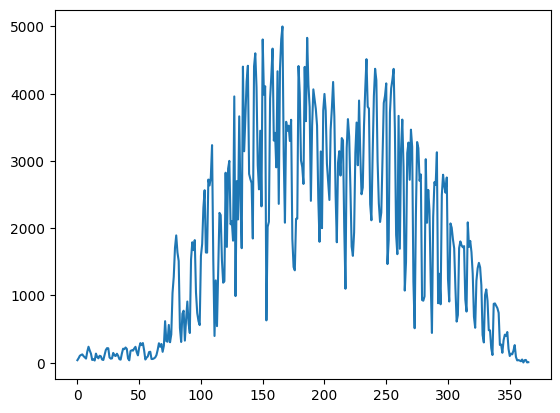

In [35]:
# plot the bikers travelling to Berri1 over the year
bikes_df['Berri1'].plot()

<Axes: >

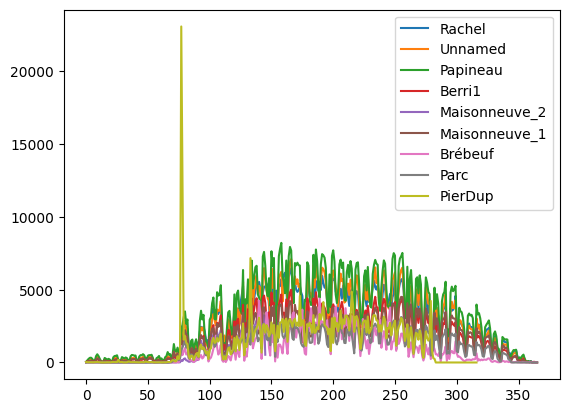

In [36]:
# plot all the columns of bikes_df
bikes_df.plot()

## Value counts

Get count of unique values in a particular column/Series.

In [18]:
# what are the unique genre in imdb_df?
imdb_df['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

<Axes: xlabel='genre'>

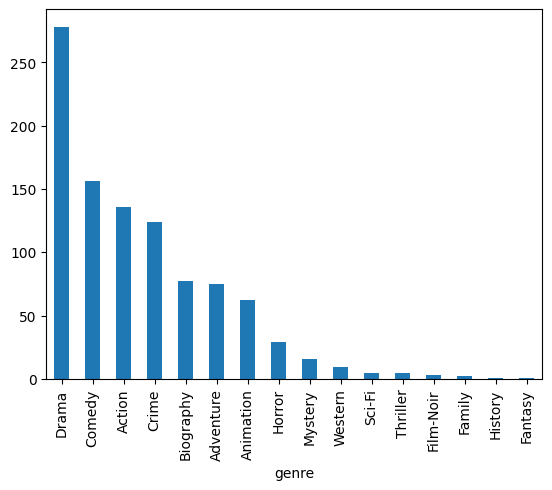

In [19]:
#plotting values of all unique genres as bar chart
imdb_df['genre'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

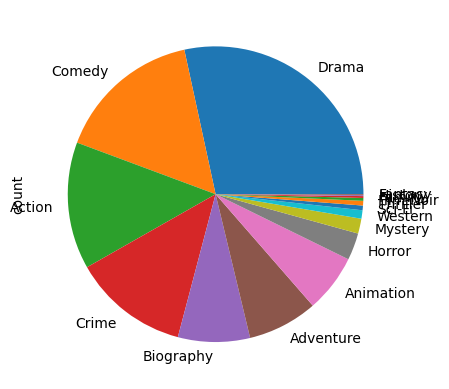

In [20]:
# plotting value counts of unique genres as a pie chart
imdb_df['genre'].value_counts().plot(kind='pie')

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [37]:
# show index of bikes_df
bikes_df.index

RangeIndex(start=0, stop=366, step=1)

In [47]:
# get row for date 2012-01-01

bikes_df.index=bikes_df['Date']
bikes_df.loc['01/01/2012']

,01/01/2012
Date,01/01/2012
Rachel,16
Unnamed,35
Papineau,51
Berri1,38
Maisonneuve_2,5.0
Maisonneuve_1,26
Brébeuf,10
Parc,0
PierDup,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [48]:
# show 11th row of imdb_df using iloc
imdb_df.iloc[10]

,10
star_rating,8.8
title,The Lord of the Rings: The Fellowship of the Ring
content_rating,PG-13
genre,Adventure
duration,178
actors_list,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."


## Selecting rows where column has a particular value

In [24]:
# select only those movies where genre is adventure
imdb_df[imdb_df['genre']=='adventure'].head()


,star_rating,title,content_rating,genre,duration,actors_list


In [25]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
imdb_df[(imdb_df['star_rating']>8)&(imdb_df['duration']>130)]['genre'].value_counts().head(1)

,count
genre,
Drama,36


## Adding a new column to DataFrame

In [63]:
# add a weekday column to bikes_df
bikes_df = bikes_df.reset_index(drop=True)
bikes_df['weekday']=pd.to_datetime(bikes_df.index).weekday

## Deleting an existing column from DataFrame

In [50]:
# remove column 'Unnamed: 1' from bikes_df

bikes_df.drop('Unnamed',axis=1,inplace=True)

Index(['Date', 'Rachel', 'Unnamed', 'Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup'],
      dtype='object')


## Deleting a row in DataFrame

In [51]:
# remove row no. 1 from bikes_df
bikes_df.drop(bikes_df.index[0])

,Date,Rachel,Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup
Date,,,,,,,,,
02/01/2012,02/01/2012,43,153,68,11.0,53,6,1,21.0
03/01/2012,03/01/2012,58,248,104,2.0,89,3,2,15.0
04/01/2012,04/01/2012,61,318,116,2.0,111,8,1,19.0
05/01/2012,05/01/2012,95,330,124,6.0,97,13,2,16.0
06/01/2012,06/01/2012,75,244,98,4.0,86,4,0,17.0
...,...,...,...,...,...,...,...,...,...
27/12/2012,27/12/2012,8,7,4,NaN,1,2,0,NaN
28/12/2012,28/12/2012,0,3,38,NaN,0,0,0,NaN
29/12/2012,29/12/2012,0,8,42,NaN,9,0,0,NaN


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [52]:
# group imdb_df by movie genres
imdb_df.groupby('genre')

In [53]:
# get crime movies group
imdb_df.groupby('genre').get_group('Crime').head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."


In [54]:
# get mean of movie durations for each group
imdb_df.groupby('genre')['duration'].mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


In [55]:
# change duration of all movies in a particular genre to mean duration of the group
imdb_df['duration']=imdb_df.groupby('genre')['duration'].transform(lambda x:x.mean())

In [58]:
# drop groups/genres that do not have average movie duration greater than 120.
imdb_df.drop(imdb_df.groupby('genre').filter(lambda x:x['duration'].mean()>120),axis=1,inplace=True)

In [64]:
# group weekday wise bikers count
bikes_df.groupby('weekday')

In [65]:
# get weekday wise biker count
bikes_df.groupby('weekday').sum()

,Date,Rachel,Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup
weekday,,,,,,,,,
3,01/01/201202/01/201203/01/201204/01/201205/01/...,953669,1160996,652857,92081.0,621510,331969,406006,455185.0


,Berri1
weekday,
3,"Axes(0.125,0.11;0.775x0.77)"


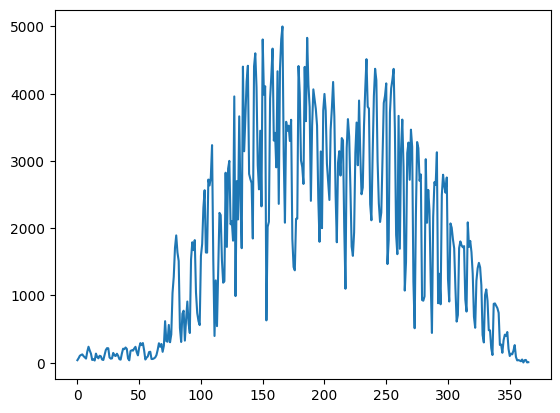

In [67]:
# plot weekday wise biker count for 'Berri1'
bikes_df.groupby('weekday')['Berri1'].plot()